In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
training_data = pd.read_csv('train.csv')

In [3]:
training_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


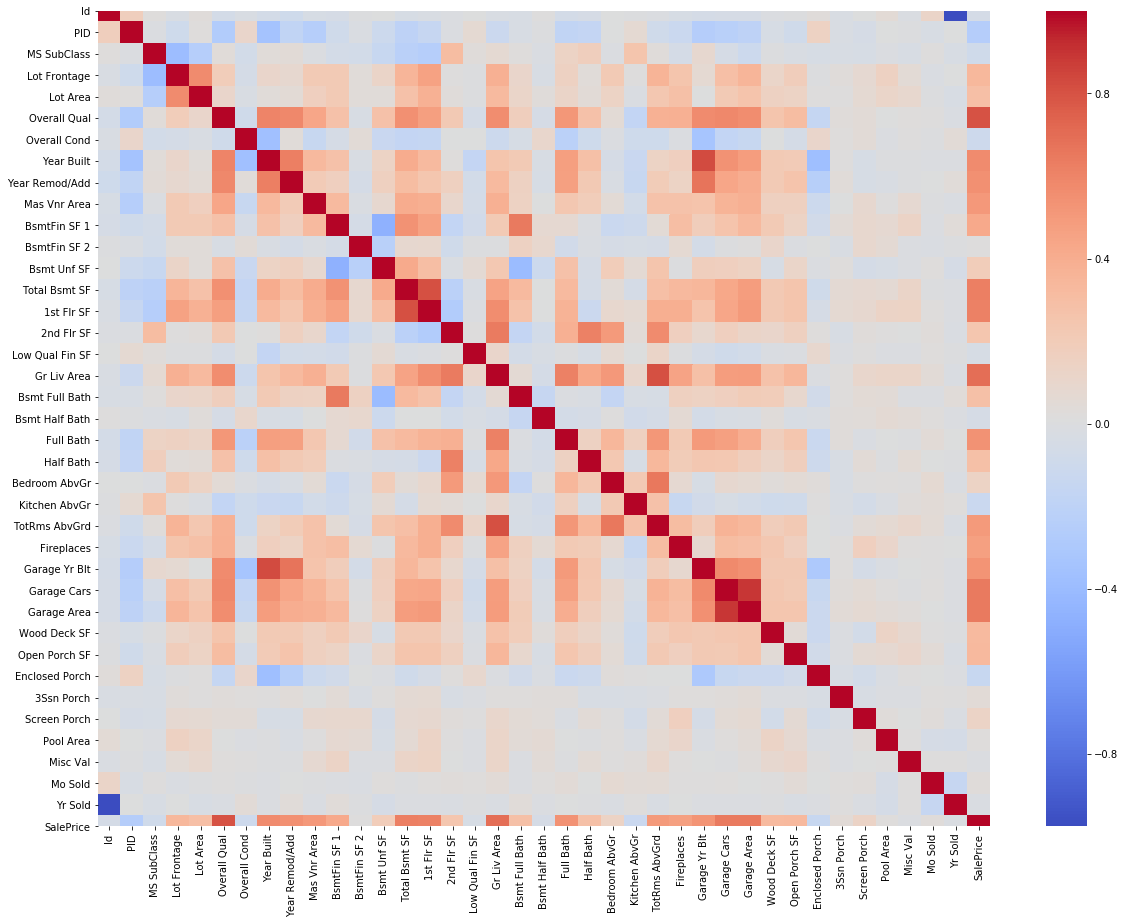

In [4]:
corr = training_data.corr()

plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap='coolwarm')

In [5]:
training_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [6]:
numerical_train = training_data.select_dtypes(['number'])
numerical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 39 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Mas Vnr Area       2029 non-null float64
BsmtFin SF 1       2050 non-null float64
BsmtFin SF 2       2050 non-null float64
Bsmt Unf SF        2050 non-null float64
Total Bsmt SF      2050 non-null float64
1st Flr SF         2051 non-null int64
2nd Flr SF         2051 non-null int64
Low Qual Fin SF    2051 non-null int64
Gr Liv Area        2051 non-null int64
Bsmt Full Bath     2049 non-null float64
Bsmt Half Bath     2049 non-null float64
Full Bath          2051 non-null int64
Half Bath          2051 non-null int64
Bedroom AbvGr      

In [7]:
numerical_train.drop(['Garage Yr Blt','Lot Frontage'], inplace=True, axis=1)

numerical_train.dropna(axis=0, how='any', inplace=True)
numerical_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Data columns (total 37 columns):
Id                 2026 non-null int64
PID                2026 non-null int64
MS SubClass        2026 non-null int64
Lot Area           2026 non-null int64
Overall Qual       2026 non-null int64
Overall Cond       2026 non-null int64
Year Built         2026 non-null int64
Year Remod/Add     2026 non-null int64
Mas Vnr Area       2026 non-null float64
BsmtFin SF 1       2026 non-null float64
BsmtFin SF 2       2026 non-null float64
Bsmt Unf SF        2026 non-null float64
Total Bsmt SF      2026 non-null float64
1st Flr SF         2026 non-null int64
2nd Flr SF         2026 non-null int64
Low Qual Fin SF    2026 non-null int64
Gr Liv Area        2026 non-null int64
Bsmt Full Bath     2026 non-null float64
Bsmt Half Bath     2026 non-null float64
Full Bath          2026 non-null int64
Half Bath          2026 non-null int64
Bedroom AbvGr      2026 non-null int64
Kitchen AbvGr      20

C:\Users\Houst\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Houst\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# sns.pairplot(numerical_train)

C:\Users\Houst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


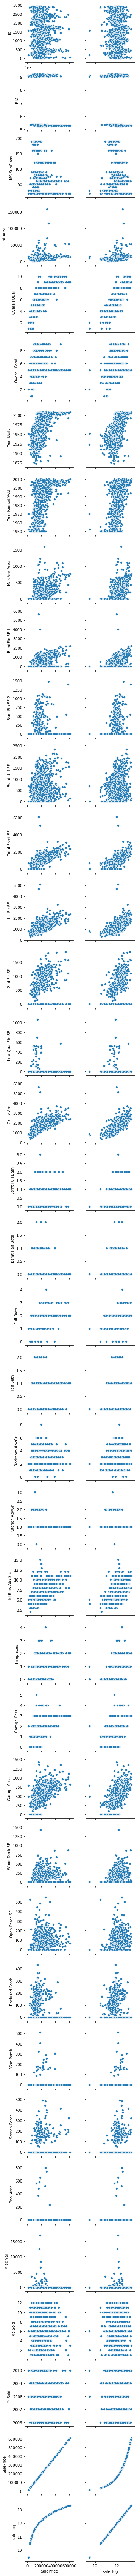

In [9]:
numerical_train['sale_log'] = np.log(numerical_train['SalePrice'])
sns.pairplot(numerical_train, x_vars=['SalePrice','sale_log'], y_vars=numerical_train.columns)

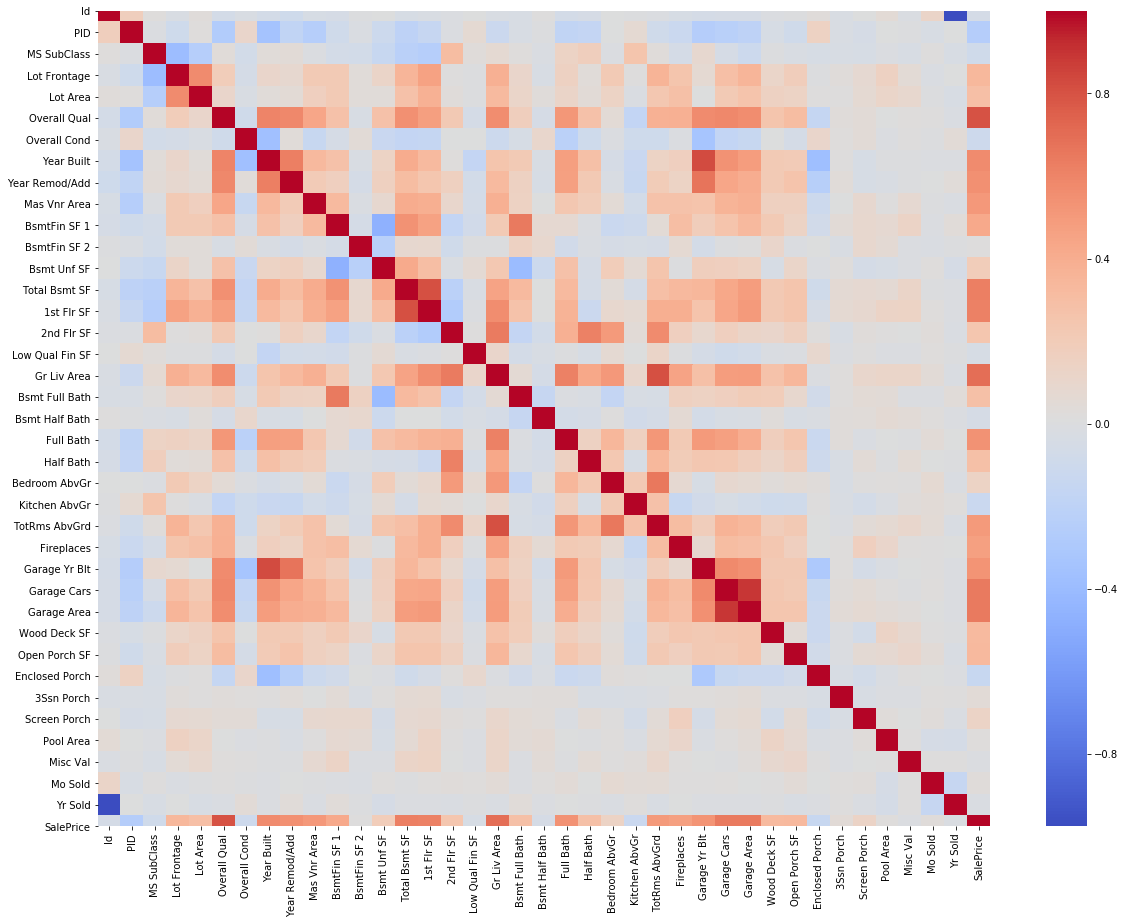

In [10]:
corr = training_data.corr()

plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap='coolwarm')

In [11]:
X = numerical_train.drop(['SalePrice','sale_log'], axis=1)
y = numerical_train['SalePrice']
y_log = numerical_train['sale_log']

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X, y)

preds = model.predict(X)

model.score(X, y)

log_model = LinearRegression()
log_model.fit(X, y_log)
log_preds = log_model.predict(X)

log_model.score(X, y_log)

not_sure_what_to_call_this = np.exp(y_log)
also_not_sure = np.exp(log_model.score(X, y_log))
unlog_preds = np.exp(log_preds)

print(mean_absolute_error(y ,log_preds))
print(mean_absolute_error(y, preds))
print(mean_absolute_error(y, unlog_preds))

180891.8424786174
20797.040846725868
17110.006420712074


In [16]:
# Will adjust with dummy columns based on future reviews


# cheese_X = training_data.drop('SalePrice', axis=1)
# cheese_y = training_data['SalePrice']
# cheese_model = LinearRegression()
# cheese_model.fit(cheese_X, cheese_y)

# cheese_model.score(cheese_X, cheese_y)

In [30]:
log_model.coef_

array([-5.99384576e-02, -7.20686586e-04, -5.18617344e-04, -3.95498907e-04,
       -4.77204937e-05, -1.03708699e-05, -5.00530554e-06, -4.11194675e-06,
       -3.77079001e-06, -5.71035933e-11,  2.92635835e-06,  4.04777952e-06,
        1.68943417e-05,  2.69345530e-05,  3.87347842e-05,  5.15171794e-05,
        5.59751218e-05,  8.99142901e-05,  9.22963140e-05,  1.37900565e-04,
        2.10584201e-04,  2.33309857e-04,  2.84390288e-04,  3.98528934e-04,
        1.14874289e-03,  3.22405047e-03,  5.07278031e-03,  5.93536426e-03,
        1.03283706e-02,  1.18650796e-02,  2.30939124e-02,  4.02512511e-02,
        5.10647733e-02,  5.27417052e-02,  5.39296331e-02,  9.29222324e-02])

In [31]:
log_model.intercept_

-18.824397935073737